In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
path = "total-production.csv"

coffee_production = pd.read_csv(path).T

In [21]:
coffee_production.columns = coffee_production.iloc[0] #replace the column names with the values from the first row
coffee_production = coffee_production.drop("total_production")

# Coffee Production Stats

In [22]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [23]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [24]:
# Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. 
#Change the xticks to two letter country abbreviations

top10_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10]            
top10_producers

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

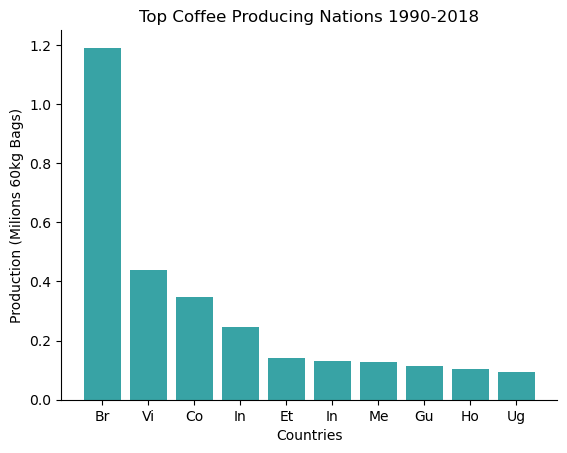

In [25]:
fig, ax = plt.subplots()

top_countries = top10_producers.index.to_list()
labels = [country[:2] for country in top_countries]
positions = list(range(10))

ax.bar(
    x=top10_producers.index,
    height= top10_producers / 1000000,
    color='#38a3a5'
)

ax.set_title('Top Coffee Producing Nations 1990-2018')
ax.set_xlabel('Countries')
ax.set_ylabel('Production (Milions 60kg Bags)')

ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Top 5 over time

In [26]:
top5_countries = coffee_production.sum().sort_values(ascending=False).iloc[:5] 
top5_countries = top5_countries.index.to_list()

top5= coffee_production.loc[:, top5_countries]
top5.index = top5.index.astype('datetime64[ns]')

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


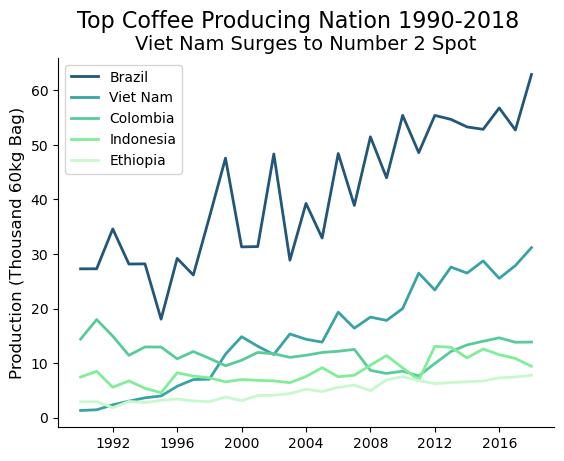

In [27]:
fig, ax = plt.subplots()

ax.plot(top5.index, coffee_production['Brazil'] / 1000, color = '#22577a', linewidth = 2, label = 'Brazil')
ax.plot(top5.index, coffee_production['Viet Nam'] / 1000, color = '#38a3a5', linewidth = 2, label = 'Viet Nam')
ax.plot(top5.index, coffee_production['Colombia'] / 1000, color = '#57cc99', linewidth = 2, label = 'Colombia')
ax.plot(top5.index, coffee_production['Indonesia'] / 1000, color = '#80ed99', linewidth = 2, label = 'Indonesia')
ax.plot(top5.index, coffee_production['Ethiopia'] / 1000, color = '#c7f9cc', linewidth = 2, label = 'Ethiopia')

fig.suptitle('Top Coffee Producing Nation 1990-2018', fontsize=16)
ax.set_title('Viet Nam Surges to Number 2 Spot', fontsize=14)
ax.set_ylabel('Production (Thousand 60kg Bag)', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()
plt.show()

# COMPOSITION OVER TIME

In [28]:
#Create a new DataFrame with the same index
brazil_vs_others = pd.DataFrame(index=coffee_production.index)

# Keep "Brazil" column unchanged
brazil_vs_others["Brazil"] = coffee_production["Brazil"]

# Sum all other countries into "Others" (excluding Brazil)
brazil_vs_others["rest_of_world"] = coffee_production.drop(columns=["Brazil"]).sum(axis=1)

brazil_vs_others.head()

,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.047,65121.147


In [29]:
brazil_vs_others = (coffee_production
                   .assign(rest_of_world = coffee_production
                           .drop('Brazil', axis=1).sum(axis=1)
                          )
                   .loc[:, ['Brazil', 'rest_of_world']]
                   .astype({'Brazil':'float64','rest_of_world':'float64'})
                   )

brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


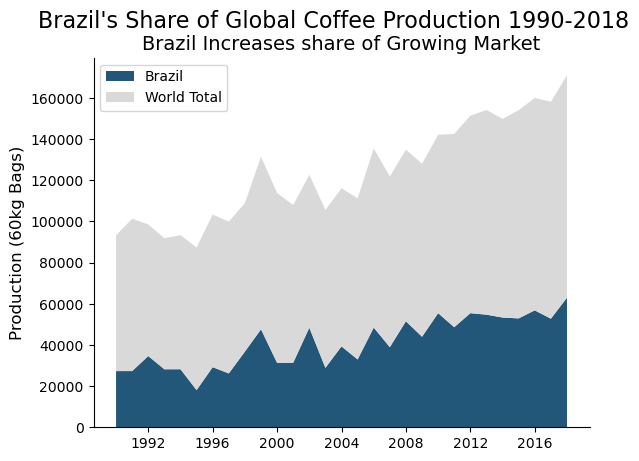

In [30]:
fig, ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index.astype('datetime64[ns]'),
    brazil_vs_others['Brazil'],
    brazil_vs_others['rest_of_world'],
    labels=['Brazil', 'World Total'],
    colors= ['#22577a', '#d9d9d9']
       )

fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018", fontsize=16)
ax.set_title('Brazil Increases share of Growing Market', fontsize=14)
ax.set_ylabel('Production (60kg Bags)', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc='upper left')        

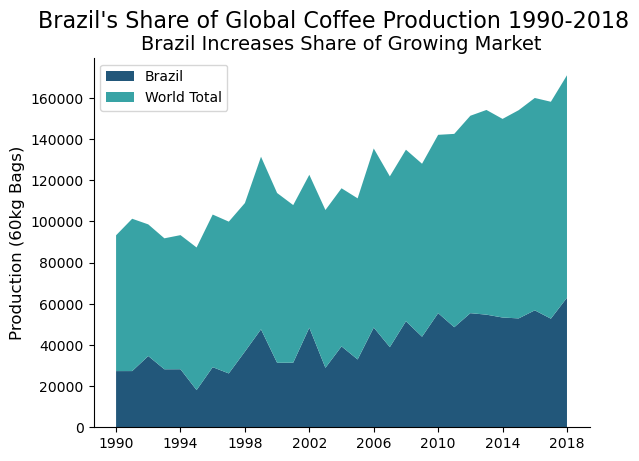

In [31]:
# Convert all values to numeric
brazil_vs_others = brazil_vs_others.apply(pd.to_numeric, errors='coerce')

colors = ['#22577a', '#38a3a5']

fig, ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index, 
    brazil_vs_others['Brazil'],
    brazil_vs_others['rest_of_world'],
    labels=['Brazil', 'World Total'],
    colors = colors
)

fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018", fontsize=16)
ax.set_title('Brazil Increases Share of Growing Market', fontsize=14)
ax.set_ylabel('Production (60kg Bags)', fontsize=12)
ax.set_xticks(brazil_vs_others.index[::4])


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc='upper left')

plt.show()

## PRODUCTION RELATIONSHIPS

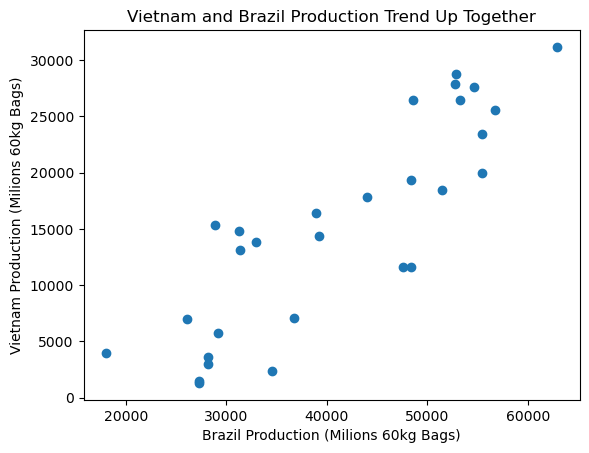

In [32]:
fig, ax = plt.subplots()

ax.scatter(
    x=coffee_production['Brazil'],
    y=coffee_production['Viet Nam']
)

ax.set_title('Vietnam and Brazil Production Trend Up Together')
ax.set_ylabel('Vietnam Production (Milions 60kg Bags)')
ax.set_xlabel('Brazil Production (Milions 60kg Bags)')

plt.show()

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [33]:
# Step 1: Get the top 5 producers by total sum
top_5 = coffee_production.sum().sort_values(ascending=False).iloc[:5].index.tolist()  # Get top 5 country names
top_5

['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']

In [34]:
# Step 2: Create a new DataFrame with the top 5 producers and "Rest of World"
top5_others = (coffee_production
               .loc[:, top_5]  # Select only the top 5 producer columns
               .assign(Rest_of_World = coffee_production.drop(columns=top_5).sum(axis=1))  # Sum all other countries
              )
top5_others.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia,Rest_of_World
1990,27285.6286,1310.288,14396.0,7441.383,2909.451,39887.309
1991,27293.4934,1437.848,17980.397,8493.196,2924.664,43137.086
1992,34603.3542,2340.447,14946.878,5569.478,1825.171,39240.571
1993,28166.9786,3020.216,11422.422,6743.288,2967.004,39444.713
1994,28192.047,3631.609,12964.0,5367.878,2762.73,40394.93


In [35]:
top5_others_2018 = top5_others.loc['2018']
top5_others_2018 = top5_others_2018.iloc[::-1]
top5_others_2018

total_production
Rest_of_World    45786.0003
Ethiopia          7776.2234
Indonesia         9417.5942
Colombia          13857.962
Viet Nam         31174.0742
Brazil           62924.8836
Name: 2018, dtype: object

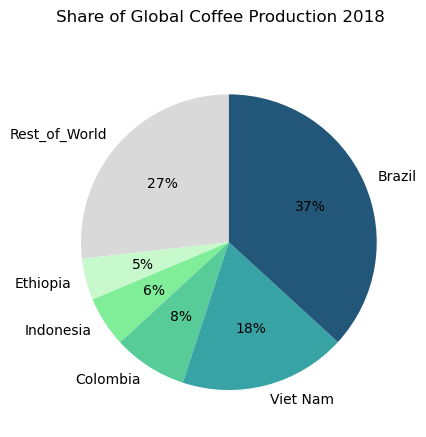

In [36]:
fig, ax = plt.subplots()
colors =['#22577a', '#38a3a5', '#57cc99', '#80ed99', '#c7f9cc', '#d9d9d9']

ax.pie(top5_others_2018,
       labels = top5_others_2018.index,
       startangle=90,
       autopct='%.0f%%',
       colors = colors[::-1]
      )

fig.suptitle('Share of Global Coffee Production 2018')

plt.show()

In [37]:
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


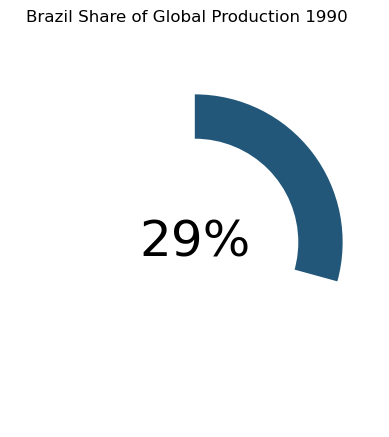

In [38]:
fig, ax = plt.subplots()

ax.pie(brazil_vs_others.loc['1990'].iloc[::-1],
       startangle=90,
       colors = ['white', '#22577a']
      )

fig.suptitle('Brazil Share of Global Production 1990')

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%",
    ha ='center',
    va='center',
    fontsize=36
)


plt.show()

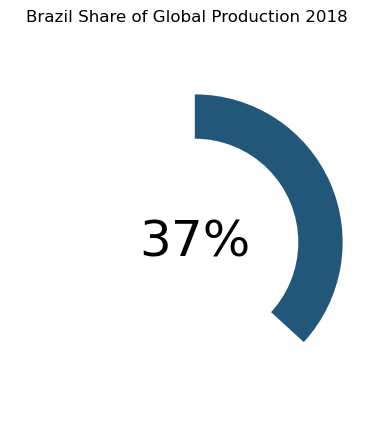

In [39]:
fig, ax = plt.subplots()

ax.pie(brazil_vs_others.loc['2018'].iloc[::-1],
       startangle=90,
       colors = ['white', '#22577a']
      )

fig.suptitle('Brazil Share of Global Production 2018')

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%",
    ha ='center',
    va='center',
    fontsize=36
)


plt.show()

# Coffee Consumption Vs. Prices

In [40]:
imports = pd.read_csv("imports.csv")
imports.head()

,imports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
2,Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
4,Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [41]:
consumption = pd.read_csv('imports.csv').set_index('imports').mean(axis=1)
consumption.name = 'imports'
consumption.head()

imports
   Austria               1551.083333
   Belgium               4639.533333
   Belgium/Luxembourg    2329.444444
   Bulgaria               397.250000
   Croatia                349.136364
Name: imports, dtype: float64

In [42]:
prices = pd.read_csv("retail-prices.csv")
prices.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [43]:
prices=pd.read_csv("retail-prices.csv").set_index('retail_prices').mean(axis=1)
prices.head()

retail_prices
   Austria    11.571135
   Cyprus     10.437695
   Denmark    10.494025
   Finland     7.211692
   France      6.850879
dtype: float64

In [44]:
price_cons = (pd.DataFrame(prices)
              .merge(consumption,
                     how = 'inner',
                     left_on = prices.index,
                     right_on = consumption.index
                    )
              .sort_values(['imports'], ascending=False)
             )

price_cons.columns=['Country', 'Price', 'Imports']

price_cons['Country'] = price_cons['Country'].str.strip(' ')
price_cons

,Country,Price,Imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


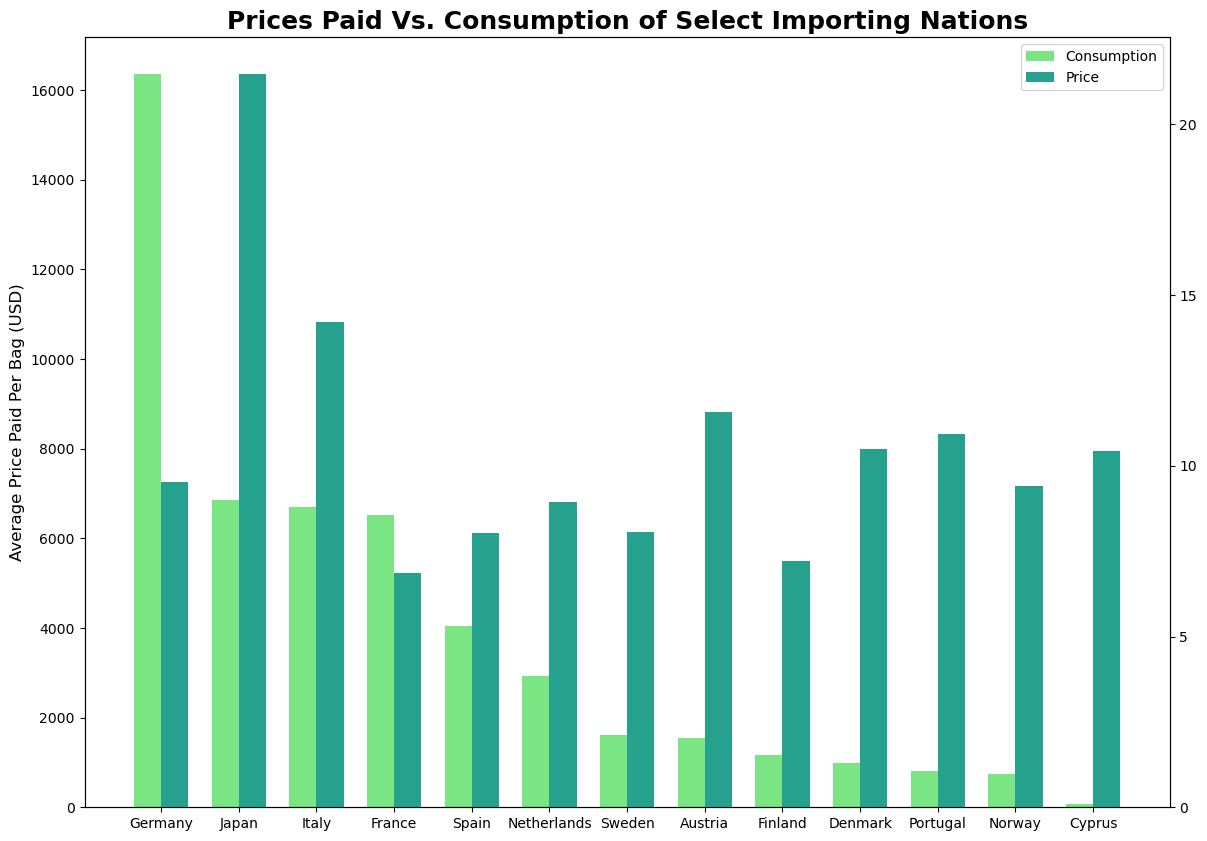

In [45]:
fig, ax = plt.subplots(figsize=(14, 10))

width=.35
x=np.arange(0, len(price_cons['Country']))

bar1 = ax.bar(x-width/2, price_cons['Imports'], width=width, color='#7ae582')
ax.set_title('Prices Paid Vs. Consumption of Select Importing Nations', fontsize=18, fontweight='bold')
ax.set_ylabel('Consumption (k 60kg Bags)', fontsize=12)

ax2= ax.twinx()

bar2 = ax2.bar(x+width/2, price_cons['Price'], width=width, color='#25a18e')
ax.set_ylabel('Average Price Paid Per Bag (USD)', fontsize=12)

plt.xticks(x, price_cons['Country'], fontsize=7)

ax.legend([bar1, bar2], ['Consumption', 'Price'])